In [302]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
import seaborn as sns
import numpy as np

Aannames
aanname 1: beiden strategieën beginnen met 50000 euro/dollar
aanname 2: Cash krijgt geen rente

Strategie 1: Gespreid beleggen over een periode van 24 maanden.
Strategie 2: Alles in één keer

In [346]:
START_DATE = "1980-01-01"
END_DATE = "2000-01-01"
SELECTED_TICKER = "^GSPC"
MAAND = 12
JAAR = 1
AMOUNT = 50000

In [347]:
data = YahooFinancials(SELECTED_TICKER)
prijs = data.get_current_price()
prijs

4441.67

In [348]:
# klopt met wat er op yahoo finance staat, dus we kunnen door

In [349]:
# return hisorical prices under the selected ticker
df = data.get_historical_price_data(START_DATE, END_DATE, "monthly")

In [350]:
# drop unix timestamp
df = pd.DataFrame(df[SELECTED_TICKER]["prices"]).drop(columns="date")

# convert formatted_date to datetime in pandas
df["formatted_date"] = pd.to_datetime(df["formatted_date"])

# set date as index of the dataframe
df.set_index("formatted_date", inplace=True)

# drop null values, if any
df = df.dropna()

In [351]:
df.drop(columns=['open', 'high', 'volume', 'adjclose', 'low'], inplace=True)
df

,close
formatted_date,
1985-01-01,179.630005
1985-02-01,181.179993
1985-03-01,180.660004
1985-04-01,179.830002
1985-05-01,189.550003
...,...
1999-08-01,1320.410034
1999-09-01,1282.709961
1999-10-01,1362.930054


In [345]:
df.shape

(60, 1)

In [309]:
#cumulatieve aantal stuks x huidige prijs
df['portfolio_waarde'] = np.nan
#cumulatieve prijs
df['cum_prijs'] = np.nan
#cumulatieve aantal aandelen
df['aantal aandelen'] = np.nan
#aantal stuks aandelen per keer
df['stuks'] = np.nan

In [310]:
dca = df 

[Text(0.5, 0, ''), Text(0, 0.5, '')]

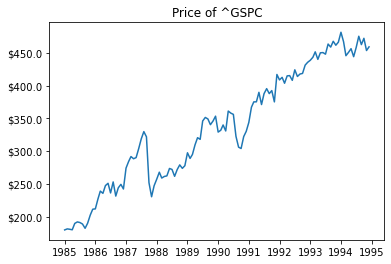

In [311]:
ax = sns.lineplot(data=dca['close'])
ax.yaxis.set_major_formatter('${x:1.1f}')
ax.set_title(f"Price of {SELECTED_TICKER}")
ax.set(xlabel=None, ylabel=None)

In [312]:
from core.trading import TradingSimulation

# DCA - Periodiek Beleggen
Elke maand 2083,33
totale investering 50 000

In [313]:
dca

,close,portfolio_waarde,cum_prijs,aantal aandelen,stuks
formatted_date,,,,,
1985-01-01,179.630005,NaN,NaN,NaN,NaN
1985-02-01,181.179993,NaN,NaN,NaN,NaN
1985-03-01,180.660004,NaN,NaN,NaN,NaN
1985-04-01,179.830002,NaN,NaN,NaN,NaN
1985-05-01,189.550003,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1994-08-01,475.489990,NaN,NaN,NaN,NaN
1994-09-01,462.709991,NaN,NaN,NaN,NaN
1994-10-01,472.350006,NaN,NaN,NaN,NaN


In [314]:
# per maand 2083,33 dollar aan aandelen kopen. Stuks te berekenen door 2083,33 / price
stuks = []
for price in dca['close']:
    stuk = 2083.33 / price
    stuks.append(stuk)
dca['stuks'] = stuks

In [315]:
for x in range(25,120):
    dca['stuks'][x] = 0

In [316]:
dca['aantal aandelen'] = np.cumsum(dca['stuks'])

In [317]:
dca['portfolio_waarde'] = dca['close'] * dca['aantal aandelen']
dca['cum_prijs'] = np.cumsum(dca['close']) * dca['stuks']

In [318]:
dca

,close,portfolio_waarde,cum_prijs,aantal aandelen,stuks
formatted_date,,,,,
1985-01-01,179.630005,2083.330000,2083.330000,11.597895,11.597895
1985-02-01,181.179993,4184.636596,4148.837193,23.096571,11.498676
1985-03-01,180.660004,6255.956633,6244.108684,34.628343,11.531772
1985-04-01,179.830002,8310.545045,8356.258244,46.213340,11.584997
1985-05-01,189.550003,10843.068767,10011.084741,57.204266,10.990926
...,...,...,...,...,...
1994-08-01,475.489990,116534.673414,0.000000,245.083337,0.000000
1994-09-01,462.709991,113402.508669,0.000000,245.083337,0.000000
1994-10-01,472.350006,115765.115626,0.000000,245.083337,0.000000


[Text(0.5, 0, ''), Text(0, 0.5, '')]

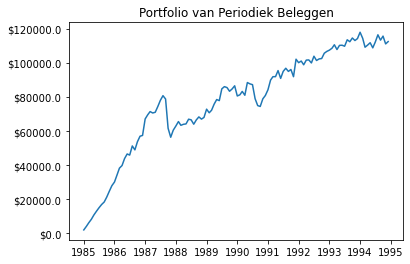

In [319]:
ax = sns.lineplot(data=dca['portfolio_waarde'])
ax.yaxis.set_major_formatter('${x:1.1f}')
ax.set_title("Portfolio van Periodiek Beleggen")
ax.set(xlabel=None, ylabel=None)

In [320]:
np.max(dca['portfolio_waarde'])

118034.58223863613

# 3. Lump Sum - Alles in één keer - A1

In [321]:
data = YahooFinancials(SELECTED_TICKER)

In [322]:
# return hisorical prices under the selected ticker
df1 = data.get_historical_price_data(START_DATE, END_DATE, "monthly")

In [323]:
# drop unix timestamp
df1 = pd.DataFrame(df1[SELECTED_TICKER]["prices"]).drop(columns="date")

# convert formatted_date to datetime in pandas
df1["formatted_date"] = pd.to_datetime(df1["formatted_date"])

# set date as index of the dataframe
df1.set_index("formatted_date", inplace=True)

# drop null values, if any
df1 = df1.dropna()

In [324]:
df1.drop(columns=['open', 'high', 'volume', 'adjclose', 'low'], inplace=True)
df1

,close
formatted_date,
1985-01-01,179.630005
1985-02-01,181.179993
1985-03-01,180.660004
1985-04-01,179.830002
1985-05-01,189.550003
...,...
1994-08-01,475.489990
1994-09-01,462.709991
1994-10-01,472.350006


In [325]:
#cumulatieve aantal stuks x huidige prijs
df1['portfolio_waarde'] = np.nan
#cumulatieve aantal aandelen
df1['aantal aandelen'] = np.nan
#aantal stuks aandelen per keer
df1['stuks'] = np.nan
df1['cash'] = np.nan

In [326]:
df1

,close,portfolio_waarde,aantal aandelen,stuks,cash
formatted_date,,,,,
1985-01-01,179.630005,NaN,NaN,NaN,NaN
1985-02-01,181.179993,NaN,NaN,NaN,NaN
1985-03-01,180.660004,NaN,NaN,NaN,NaN
1985-04-01,179.830002,NaN,NaN,NaN,NaN
1985-05-01,189.550003,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1994-08-01,475.489990,NaN,NaN,NaN,NaN
1994-09-01,462.709991,NaN,NaN,NaN,NaN
1994-10-01,472.350006,NaN,NaN,NaN,NaN


In [327]:
df1['stuks'][0] = 50000 / df1['close'][0]
df1['portfolio_waarde'][0] = df1['close'][0] * df1['stuks'][0]

In [328]:
df1.to_excel('lump.xlsx')

In [329]:
for x in range(0,120):
    df1['aantal aandelen'][x] = df1['stuks'][0]
    if x > 0:
        df1['stuks'][x] = df1['stuks'][0]

https://towardsdatascience.com/simulate-your-trading-strategy-with-python-5a8a556c470e

In [330]:
df1['portfolio_waarde'] = df1['close'] * df1['aantal aandelen']

[Text(0.5, 0, ''), Text(0, 0.5, '')]

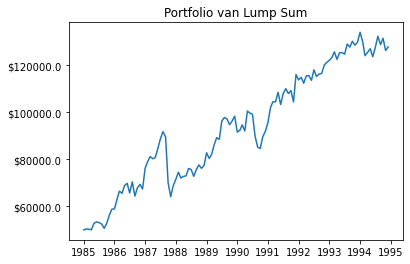

In [331]:
ax = sns.lineplot(data=df1['portfolio_waarde'])
ax.yaxis.set_major_formatter('${x:1.1f}')
ax.set_title("Portfolio van Lump Sum")
ax.set(xlabel=None, ylabel=None)

In [332]:
np.max(df1['portfolio_waarde'])

134056.10762682895

# Analyse

In [333]:
verschil = np.max(df1['portfolio_waarde']) - np.max(dca['portfolio_waarde'])
verschil

16021.525388192822

In [334]:
df1['verschil'] = df1['portfolio_waarde'] - dca['portfolio_waarde']
df1

,close,portfolio_waarde,aantal aandelen,stuks,cash,verschil
formatted_date,,,,,,
1985-01-01,179.630005,50000.000000,278.349934,278.349934,NaN,47916.670000
1985-02-01,181.179993,50431.439000,278.349934,278.349934,NaN,46246.802404
1985-03-01,180.660004,50286.700092,278.349934,278.349934,NaN,44030.743459
1985-04-01,179.830002,50055.669137,278.349934,278.349934,NaN,41745.124093
1985-05-01,189.550003,52761.230835,278.349934,278.349934,NaN,41918.162068
...,...,...,...,...,...,...
1994-08-01,475.489990,132352.607390,278.349934,278.349934,NaN,15817.933976
1994-09-01,462.709991,128795.295574,278.349934,278.349934,NaN,15392.786904
1994-10-01,472.350006,131478.593014,278.349934,278.349934,NaN,15713.477389


[Text(0.5, 0, ''), Text(0, 0.5, '')]

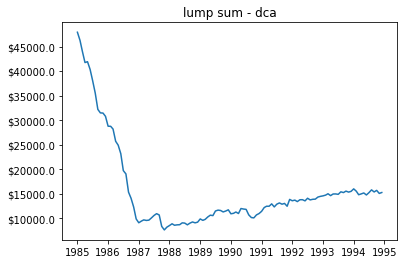

In [335]:
ax = sns.lineplot(data=df1['verschil'])
ax.yaxis.set_major_formatter('${x:1.1f}')
ax.set_title("lump sum - dca")
ax.set(xlabel=None, ylabel=None)

Text(0.5, 0.01, 'Bron: devrijestier.nl')

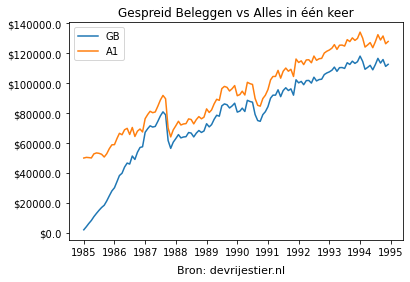

In [336]:
ax1 = sns.lineplot(data=dca['portfolio_waarde'])
ax2 = sns.lineplot(data=df1['portfolio_waarde'])
ax1.yaxis.set_major_formatter('${x:1.1f}')
ax1.set_title("Gespreid Beleggen vs Alles in één keer")
plt.legend(labels=["GB", "A1"])
ax1.set(xlabel=None, ylabel=None)
txt="Bron: devrijestier.nl"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)

In [337]:
verschil = np.max(df1['portfolio_waarde']) - np.max(dca['portfolio_waarde'])
verschil

16021.525388192822

In [352]:
table_data = {'periode': ["1980-2000", "1985-2005", "1990-2010", "1995-2015", "2000-2020"]
              , 'verschil (A1 min GB)': [48876, 50488, 9014, 42280, -15587]}
new_table = pd.DataFrame(data=table_data)
new_table

,periode,verschil (A1 min GB)
0,1980-2000,48876
1,1985-2005,50488
2,1990-2010,9014
3,1995-2015,42280
4,2000-2020,-15587


TypeError: unhashable type: 'numpy.ndarray'

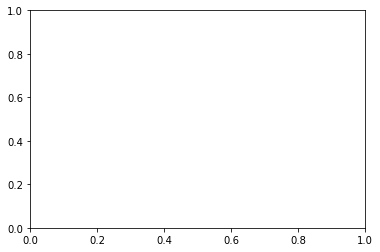

In [356]:
plt.bar(new_table, height=7)